# AIPI 590 - XAI | Mechanistic Interpretability
### A tiny neural network for XOR classification
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/main/mechanistic_interpretability.ipynb
)

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# **Part 1 - Setup**

### XOR Data Generation

In [107]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

### Build a Tiny MLP (multilayer perceptron) Model

In [108]:
class TinyXOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 4)
        self.out = nn.Linear(4, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        hidden = torch.sigmoid(self.hidden(x))
        pred = torch.sigmoid(self.out(hidden))
        return pred, hidden

model = TinyXOR()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

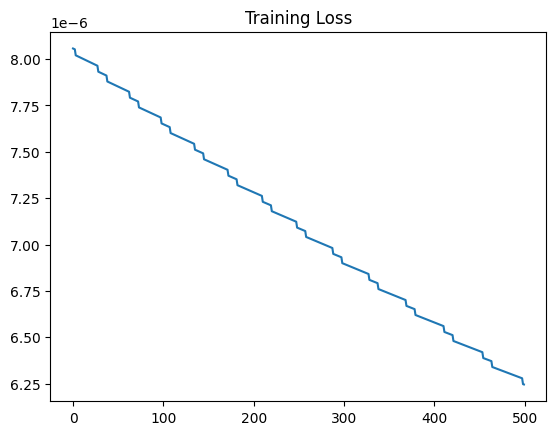

In [131]:
# Train
losses = []
for epoch in range(500):
    optimizer.zero_grad()
    pred, hidden = model(X)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title("Training Loss")
plt.show()

In [132]:
# Test predictions
with torch.no_grad():
    pred, hidden = model(X) # Get predictions and hidden activations
print(torch.round(pred))

tensor([[0.],
        [1.],
        [1.],
        [0.]])


# **Part 2 - Explore**

In [133]:
# Get hidden layer activations
hidden = hidden.numpy() # Convert tensor to numpy
print("Hidden layer activations:")
print(hidden)

Hidden layer activations:
[[9.8302370e-01 9.6650702e-01 9.6193850e-01 9.9999976e-01]
 [1.5156859e-03 3.4008098e-03 3.0344606e-03 9.9226874e-01]
 [1.1801005e-03 2.5645809e-03 3.6897070e-03 9.9226236e-01]
 [3.0972771e-08 3.0404749e-07 4.4600242e-07 3.4554473e-03]]


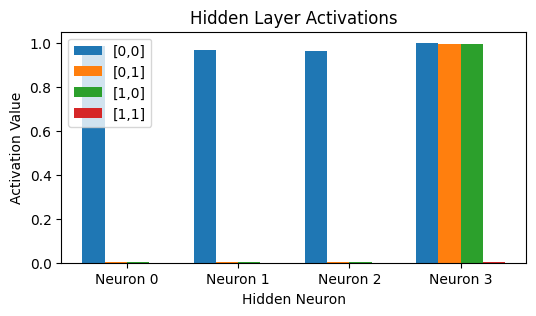

In [134]:
plt.figure(figsize=(6,3))
x_positions = np.arange(hidden.shape[1])

for index, label in enumerate(["[0,0]", "[0,1]", "[1,0]", "[1,1]"]):
    plt.bar(x_positions + index*0.2, hidden[index], width=0.2, label=label)

plt.xticks(x_positions + 0.3, [f"Neuron {i}" for i in range(hidden.shape[1])])
plt.legend()
plt.xlabel("Hidden Neuron")
plt.ylabel("Activation Value")
plt.title("Hidden Layer Activations")
plt.show()

In [135]:
# Get weights and biases
weight_hidden = model.hidden.weight.data.numpy()
bias_hidden = model.hidden.bias.data.numpy()

weight_out = model.out.weight.data.numpy()
bias_out = model.out.bias.data.numpy()

print("Hidden Layer Weights:")
print(weight_hidden)
print("Hidden Layer Biases:")
print(bias_hidden)
print("Output Layer Weights:")
print(weight_out)
print("Output Layer Bias:")
print(bias_out)

Hidden Layer Weights:
[[-10.7997875 -10.549183 ]
 [ -9.325746   -9.042688 ]
 [ -8.8282585  -9.024429 ]
 [-10.519066  -10.518229 ]]
Hidden Layer Biases:
[ 4.0588126  3.3623536  3.2297466 15.372952 ]
Output Layer Weights:
[[-9.896481 -8.696545 -8.281059 23.710007]]
Output Layer Bias:
[-11.313591]


# **Part 3 - Explain**

# **Part 4 - Reflect**